In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
import math
import random
from random import uniform

In [2]:
mnist = pd.read_csv('cp_sample.csv', sep=';')

In [3]:
data_train, data_test = train_test_split(mnist, test_size = 0.3, random_state = 4)
data_valid, data_test = train_test_split(data_test, test_size = 0.5, random_state = 4)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
n_n = KNeighborsClassifier(n_neighbors=1) # this initializes a knn for k = 1
n_n.fit(data_train.iloc[:,1:],data_train.label)
# here we fit this knn by giving the features of all the
# examples of the training set (columns 1 to last) and their labels

KNeighborsClassifier(n_neighbors=1)

In [6]:
data_train.head(2)
#data_train.iloc[0:2,1:]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
715,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
920,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
n_n.predict(data_train.iloc[0:2,1:])

array([8, 9])

In [8]:
n_n.score(data_valid.iloc[:,1:],data_valid.label)

0.7933333333333333

In [9]:
pruned_models = []
pred_scores = []
val_scores = []
for n_neighbor in range(1,11):
    dt_pruned = KNeighborsClassifier(n_neighbors=n_neighbor).fit(data_train.iloc[:,1:], data_train.label)
    p_score = dt_pruned.score(data_train.iloc[:,1:],data_train.label)
    v_score = dt_pruned.score(data_valid.iloc[:,1:],data_valid.label)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_models.append(dt_pruned)

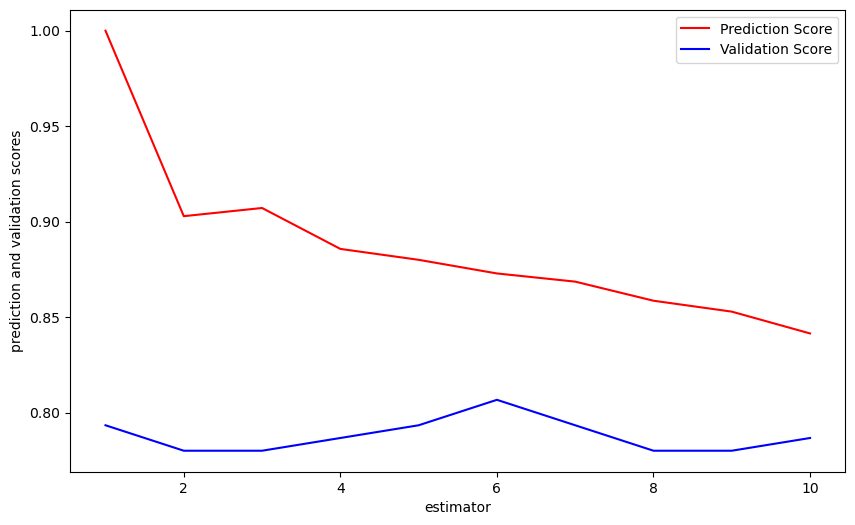

In [12]:
parameters = range(1,11)
plt.figure(figsize=(10, 6))
plt.plot(parameters, pred_scores,color='red',label='Prediction Score')
plt.plot(parameters,val_scores,color='blue',label='Validation Score')
plt.xlabel("estimator")
plt.ylabel("prediction and validation scores")
plt.legend()
plt.show()

In [13]:
best_estimator = val_scores.index(max(val_scores))
best_n_n = pruned_models[best_estimator]
best_n_n

KNeighborsClassifier(n_neighbors=6)

In [14]:
best_n_n.score(data_test.iloc[:,1:],data_test.label)

0.8333333333333334

In [10]:
from skimage.feature import hog

In [11]:
myimage = data_train.iloc[0,1:] # first image of the mnist dataset (784 pixel values)
myimage_hog = hog(myimage.to_numpy().reshape(28,28,1), orientations=8, pixels_per_cell=(14,14), cells_per_block=(1,1),channel_axis=2)
myimage_hog

array([0.50268098, 0.        , 0.50268098, 0.        , 0.49186938,
       0.        , 0.50268098, 0.        , 0.33177033, 0.        ,
       0.54464926, 0.        , 0.54464926, 0.        , 0.54464926,
       0.        , 0.37313436, 0.        , 0.58419061, 0.        ,
       0.58419061, 0.        , 0.42215331, 0.        , 0.5       ,
       0.        , 0.5       , 0.        , 0.5       , 0.        ,
       0.5       , 0.        ])

In [12]:
def my_hog(row, ori, cell):
    return(pd.Series(hog(row.iloc[1:].to_numpy().reshape(28,28,1), orientations=ori, pixels_per_cell=(cell, cell),channel_axis=2 ,cells_per_block=(1,1))))

In [13]:
hog_train = data_train.apply(my_hog, axis=1, args=(8,14))
hog_valid= data_valid.apply(my_hog, axis=1, args=(8,14))
hog_test = data_test.apply(my_hog, axis=1, args=(8,14))
hog_train['label'] = data_train.label
hog_valid['label'] = data_valid.label
hog_test['label'] = data_test.label

In [14]:
hog_train

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,label
715,0.502681,0.0,0.502681,0.0,0.491869,0.0,0.502681,0.0,0.331770,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,8
920,0.699372,0.0,0.699372,0.0,0.147506,0.0,0.000000,0.0,0.500000,0.0,...,0.0,0.681478,0.0,0.681478,0.0,0.000000,0.0,0.266785,0.0,9
295,0.465444,0.0,0.618883,0.0,0.618883,0.0,0.131647,0.0,0.500000,0.0,...,0.0,0.307510,0.0,0.543607,0.0,0.552236,0.0,0.552236,0.0,2
83,0.517744,0.0,0.517744,0.0,0.517744,0.0,0.442518,0.0,0.568812,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0
942,0.604642,0.0,0.604642,0.0,0.377247,0.0,0.355672,0.0,0.603838,0.0,...,0.0,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,0.577350,0.0,0.577350,0.0,0.577350,0.0,0.000000,0.0,0.555912,0.0,...,0.0,0.572579,0.0,0.572579,0.0,0.572579,0.0,0.128290,0.0,0
709,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.615943,0.0,...,0.0,0.656532,0.0,0.754298,0.0,0.000000,0.0,0.000000,0.0,1
439,0.707107,0.0,0.707107,0.0,0.000000,0.0,0.000000,0.0,0.566947,0.0,...,0.0,0.558947,0.0,0.558947,0.0,0.558947,0.0,0.250470,0.0,0
174,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.197028,0.0,...,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,0.500000,0.0,5


In [15]:
pruned_models = []
pred_scores = []
val_scores = []
for n_neighbor in range(1,11):
    dt_pruned = KNeighborsClassifier(n_neighbors=n_neighbor).fit(hog_train.iloc[:,:-1], hog_train.label)
    p_score = dt_pruned.score(hog_train.iloc[:,:-1],hog_train.label)
    v_score = dt_pruned.score(hog_valid.iloc[:,:-1],hog_valid.label)
    pred_scores.append(p_score)
    val_scores.append(v_score)
    pruned_models.append(dt_pruned)

: 

: 